<a href="https://colab.research.google.com/github/Harshil1752/Self_DS_projects/blob/main/Car_Purchase_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df.shape

(1000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [8]:
df = df.drop("User ID", axis = "columns")

In [9]:
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [10]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [11]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [12]:
df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

<Axes: xlabel='AnnualSalary', ylabel='Count'>

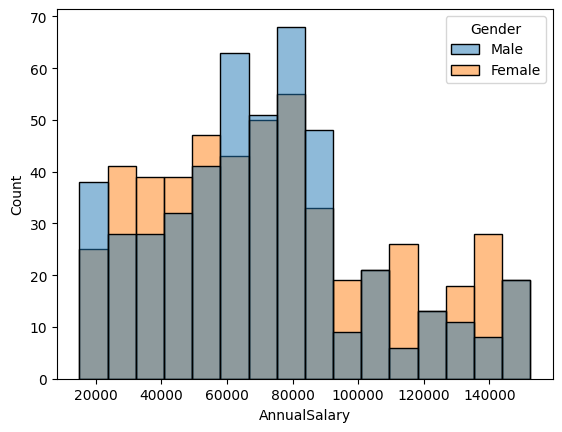

In [13]:
sns.histplot(x = "AnnualSalary", data = df, hue = 'Gender')

<Axes: xlabel='Age', ylabel='Count'>

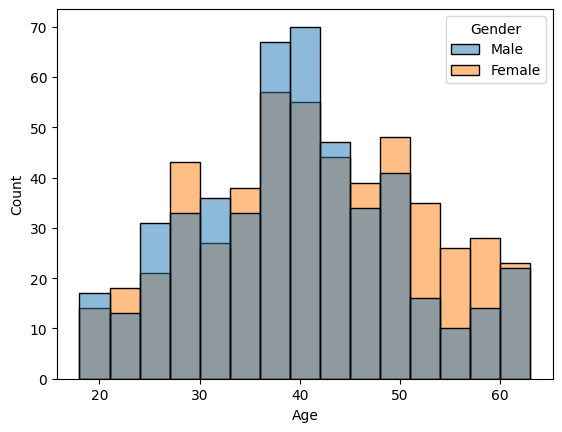

In [14]:
sns.histplot(x='Age', data=df, hue="Gender")

<Axes: xlabel='AnnualSalary', ylabel='Count'>

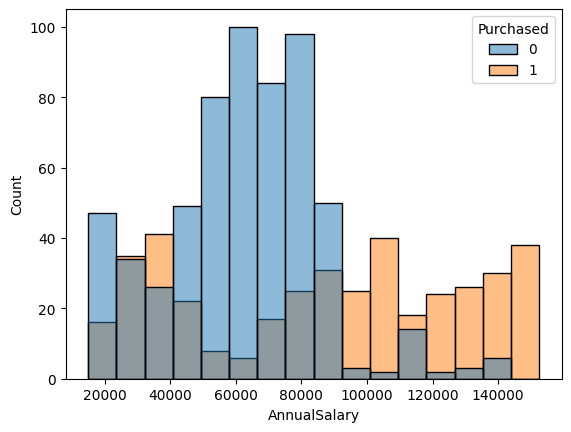

In [15]:
sns.histplot(x="AnnualSalary", data=df, hue="Purchased")

<Axes: xlabel='Age', ylabel='Count'>

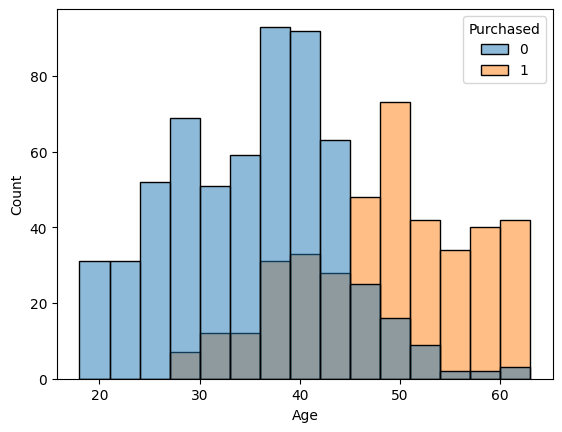

In [16]:
sns.histplot(x = 'Age', data=df, hue='Purchased')

In [17]:
df.corr()['Purchased'].sort_values()

<ipython-input-17-337c767a16b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Purchased'].sort_values()


AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

#Feature Selection

In [18]:
df = pd.get_dummies(df, drop_first=False)

In [19]:
df.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,0,1
1,40,43500,0,0,1
2,49,74000,0,0,1
3,40,107500,1,0,1
4,25,79000,0,0,1


In [20]:
df = df.drop("Gender_Male", axis='columns')

In [21]:
x = df[["AnnualSalary","Age","Gender_Female"]].copy()

In [22]:
y = df[["Purchased"]].copy()

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [25]:
from sklearn.metrics import accuracy_score

In [30]:
def modelperformance(predictions):
  print("Accuracy score in Model is {}".format(accuracy_score(y_test, predictions)))
  

#Machine Learning

In [31]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_x_train, y_train.values.ravel())
log_prediction = log_model.predict(scaled_x_test)
modelperformance(log_prediction)

Accuracy score in Model is 0.8166666666666667


In [33]:
from sklearn.neighbors import KNeighborsClassifier
test_errors = []
for k in range(1,30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_x_train, y_train.values.ravel())
  knn_predict = knn_model.predict(scaled_x_test)
  test_error_rate = 1 - accuracy_score(y_test, knn_predict)
  test_errors.append(test_error_rate)


In [34]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'K Neighbors')

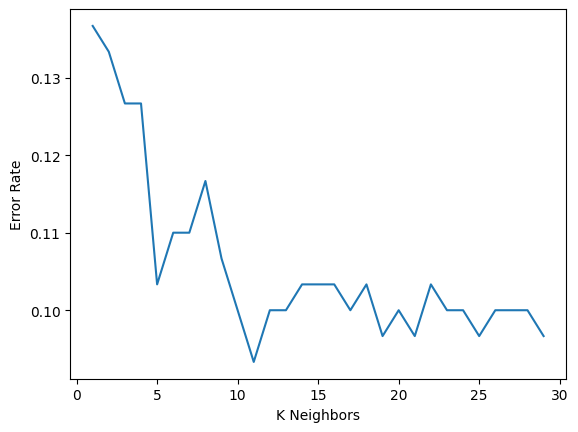

In [35]:
plt.plot(range(1,30), test_errors)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbors")

In [36]:
knn_elbowmethod = KNeighborsClassifier(n_neighbors = 12)
knn_elbowmethod.fit(scaled_x_train, y_train.values.ravel())
knn_elbow_pred = knn_elbowmethod.predict(scaled_x_test)
modelperformance(knn_elbow_pred)

Accuracy score in Model is 0.9


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [('knn', knn)])
param_grid = {'knn__n_neighbors': k_values}
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [42]:
cv_classifier.fit(scaled_x_train, y_train.values.ravel())
print(cv_classifier.best_params_)

{'knn__n_neighbors': 9}


In [43]:
pred_gridknn = cv_classifier.predict(scaled_x_test)
modelperformance(pred_gridknn)

Accuracy score in Model is 0.8933333333333333


In [44]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr = {"C":[0.01, 0.1, 0.5, 1], "kernel": ['linear', 'rbf', 'poly']}
gridsvr = GridSearchCV(svm, param_grid_svr)

In [45]:
gridsvr.fit(scaled_x_train, y_train.values.ravel())
pred_svr = gridsvr.predict(scaled_x_test)
modelperformance(pred_svr)

Accuracy score in Model is 0.8933333333333333


In [46]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(scaled_x_train, y_train.values.ravel())

DecisionTreeClassifier()

In [47]:
treepred = treemodel.predict(scaled_x_test)
modelperformance(treepred)Fa

Accuracy score in Model is 0.8433333333333334


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32, 64, 128, 256]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {'n_estimators': n_estimators, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score':oob_score}
gridrfr = GridSearchCV(rfr_model, param_grid_rfr)
gridrfr.fit(scaled_x_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [49]:
print(gridrfr.best_params_)


{'bootstrap': True, 'max_features': 2, 'n_estimators': 256, 'oob_score': False}


In [51]:
rfc = RandomForestClassifier(max_features = 2, n_estimators = 256, oob_score = False)
rfc.fit(scaled_x_train, y_train.values.ravel())
predsrfc = rfc.predict(scaled_x_test)
modelperformance(predsrfc)

Accuracy score in Model is 0.8933333333333333
